データのインポート

In [63]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Hiragino Maru Gothic Pro')

In [64]:
gdf=gpd.read_file('data/A002005212015DDSWC12/h27ka12.shp')

<Axes: >

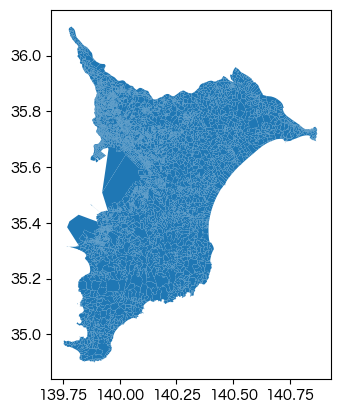

In [65]:
gdf.plot()

メッシュ空間の作成

In [66]:
chibadata1= pd.read_csv('data/tblT000866C12.txt', encoding='cp932')

1行目の削除

In [67]:
chibadata1 = chibadata1[1:]

＊をnanに置き換え

In [68]:
chibadata1 = chibadata1.replace('*',np.nan)



chiabadata１~８それぞれを結合

In [69]:
chibadata2015 = pd.concat([chibadata1])

In [70]:
columns=['HTKSYORI', 'HTKSAKI', 'GASSAN']
chibadata2015=chibadata2015.drop(columns=columns)




In [71]:
#chibadata = pd.merge(chibadata2020,on='KEY_CODE')
chibadata=chibadata2015

In [72]:
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6690 entries, 1 to 6690
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6690 non-null   float64
 1   HYOSYO      6690 non-null   float64
 2   CITYNAME    6690 non-null   object 
 3   NAME        6629 non-null   object 
 4   T000866001  6690 non-null   object 
 5   T000866002  6690 non-null   object 
 6   T000866003  6690 non-null   object 
 7   T000866004  6690 non-null   object 
 8   T000866005  6690 non-null   object 
 9   T000866006  6690 non-null   object 
 10  T000866007  6690 non-null   object 
 11  T000866008  6690 non-null   object 
 12  T000866009  6690 non-null   object 
 13  T000866010  6690 non-null   object 
 14  T000866011  6690 non-null   object 
 15  T000866012  6690 non-null   object 
 16  T000866013  6690 non-null   object 
dtypes: float64(2), object(15)
memory usage: 888.6+ KB


In [73]:
chibadata.columns

Index(['KEY_CODE', 'HYOSYO', 'CITYNAME', 'NAME', 'T000866001', 'T000866002',
       'T000866003', 'T000866004', 'T000866005', 'T000866006', 'T000866007',
       'T000866008', 'T000866009', 'T000866010', 'T000866011', 'T000866012',
       'T000866013'],
      dtype='object')

In [74]:
chibadata.columns[4:]

Index(['T000866001', 'T000866002', 'T000866003', 'T000866004', 'T000866005',
       'T000866006', 'T000866007', 'T000866008', 'T000866009', 'T000866010',
       'T000866011', 'T000866012', 'T000866013'],
      dtype='object')

In [75]:
chibadata=chibadata.replace('-',np.nan)

In [76]:
chibadata=chibadata.replace('X',np.nan)

In [77]:
chibadata[chibadata.columns[4:]]=chibadata[chibadata.columns[4:]].astype(float)

In [78]:
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6690 entries, 1 to 6690
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6690 non-null   float64
 1   HYOSYO      6690 non-null   float64
 2   CITYNAME    6690 non-null   object 
 3   NAME        6629 non-null   object 
 4   T000866001  6433 non-null   float64
 5   T000866002  5791 non-null   float64
 6   T000866003  6369 non-null   float64
 7   T000866004  6393 non-null   float64
 8   T000866005  6343 non-null   float64
 9   T000866006  6362 non-null   float64
 10  T000866007  5768 non-null   float64
 11  T000866008  5606 non-null   float64
 12  T000866009  6386 non-null   float64
 13  T000866010  6189 non-null   float64
 14  T000866011  6224 non-null   float64
 15  T000866012  6335 non-null   float64
 16  T000866013  5716 non-null   float64
dtypes: float64(15), object(2)
memory usage: 888.6+ KB


In [79]:
gdf['KEY_CODE']=gdf['KEY_CODE'].astype(float)

In [80]:
gdf =gdf.merge(chibadata, on='KEY_CODE')

In [81]:
gdf = gdf.to_crs(3857)

In [82]:
gdf

KEY_CODE PREF CITY  S_AREA PREF_NAME CITY_NAME  S_NAME KIGO_E   
0     1.210100e+08   12  101  001000       千葉県       中央区     青葉町    NaN  \
1     1.210100e+08   12  101  002000       千葉県       中央区     赤井町    NaN   
2     1.210100e+08   12  101  003000       千葉県       中央区      旭町    NaN   
3     1.210100e+08   12  101  004000       千葉県       中央区     市場町    NaN   
4     1.210101e+10   12  101  005001       千葉県       中央区  稲荷町１丁目    NaN   
...            ...  ...  ...     ...       ...       ...     ...    ...   
6578  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E2   
6579  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E1   
6580  1.246302e+08   12  463  016000       千葉県       鋸南町    上佐久間     E4   
6581  1.246302e+08   12  463  017000       千葉県       鋸南町      奥山    NaN   
6582  1.246302e+08   12  463  018000       千葉県       鋸南町      大崩    NaN   

      HCODE         AREA  ...  T000866004  T000866005  T000866006 T000866007   
0      8101   842596.677  ...       376.0       147.0       119.0       16.0  \
1      8101  1377933.475  ...       115.0       101.0        74.0       22.0   
2      8101   102830.790  ...        92.0        48.0        55.0        5.0   
3      8101   124328.843  ...        33.0        35.0        30.0        2.0   
4      8101    71919.212  ...        67.0        55.0        44.0        6.0   
...     ...          ...  ...         ...         ...         ...        ...   
6578   8101   236156.699  ...        19.0        13.0        16.0        2.0   
6579   8101  4108577.114  ...        19.0        13.0        16.0        2.0   
6580   8101    30448.385  ...        19.0        13.0        16.0        2.0   
6581   8101  3045193.412  ...         5.0         NaN         3.0        NaN   
6582   8101  3607758.273  ...         3.0         5.0         6.0        NaN   

     T000866008  T000866009 T000866010 T000866011 T000866012 T000866013  
0           4.0        57.0       17.0       36.0       38.0       49.0  
1          11.0        73.0       37.0       37.0       38.0       24.0  
2           2.0        21.0       20.0       11.0       19.0       31.0  
3           NaN        16.0        3.0        6.0        8.0       19.0  
4           NaN        29.0       12.0       11.0       24.0       21.0  
...         ...         ...        ...        ...        ...        ...  
6578       41.0        16.0       11.0        9.0       14.0        1.0  
6579       41.0        16.0       11.0        9.0       14.0        1.0  
6580       41.0        16.0       11.0        9.0       14.0        1.0  
6581       14.0         2.0        2.0        2.0        2.0        NaN  
6582       18.0         3.0        4.0        3.0        7.0        3.0  

[6583 rows x 52 columns]

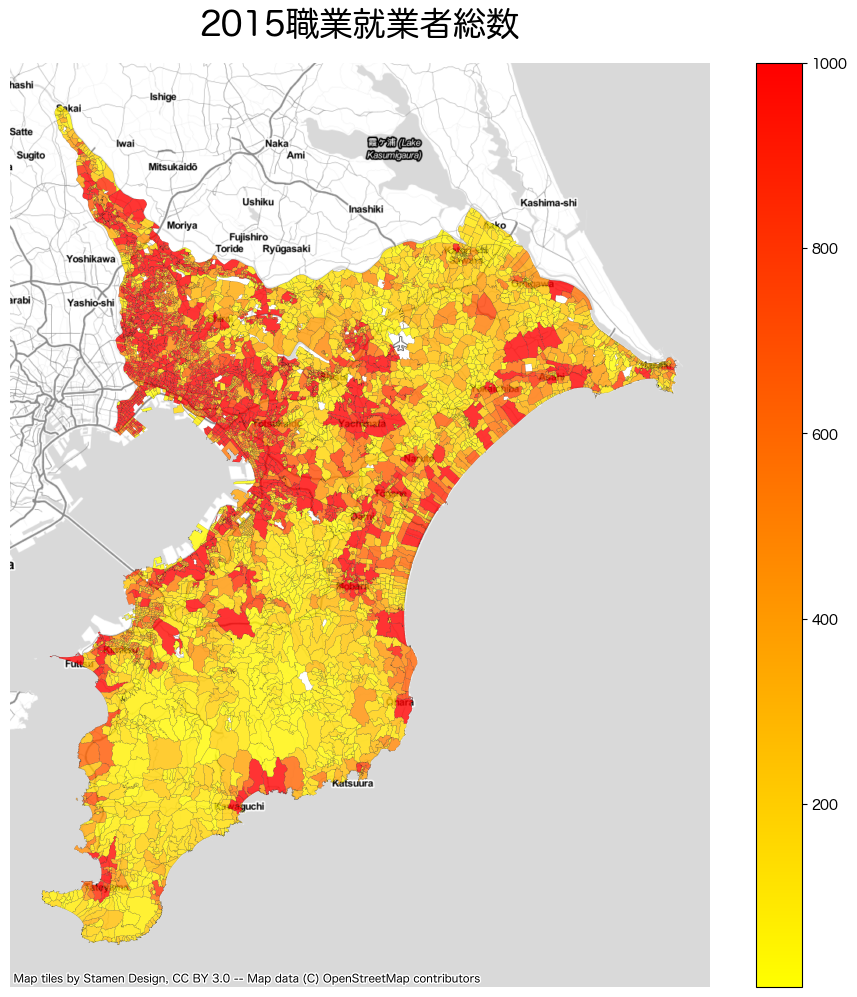

In [100]:
ax = gdf.plot(figsize=(12,12),
         column='T000866001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=1000,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2015職業就業者総数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [84]:

gdf['CITY_NAME'].value_counts().reset_index()
gdf.info()
citysum=gdf.groupby('CITY_NAME')['T000866001'].sum().reset_index()
citysum=citysum.sort_values('T000866001',ascending=False)
px.bar(citysum.head(10),x='CITY_NAME',y='T000866001')
def rank(job,title):
    citysum=gdf.groupby('CITY_NAME')[job].sum().reset_index()
    citysum=citysum.sort_values(job,ascending=False)
    fig=px.bar(citysum.head(10),x='CITY_NAME',y=job,template='seaborn',title=title)
    fig.show()
rank(job='T000866001',title='2015職業就業者総数')


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6583 non-null   float64 
 1   PREF        6583 non-null   object  
 2   CITY        6583 non-null   object  
 3   S_AREA      6583 non-null   object  
 4   PREF_NAME   6583 non-null   object  
 5   CITY_NAME   6583 non-null   object  
 6   S_NAME      6581 non-null   object  
 7   KIGO_E      1036 non-null   object  
 8   HCODE       6583 non-null   int64   
 9   AREA        6583 non-null   float64 
 10  PERIMETER   6583 non-null   float64 
 11  H27KAxx_    6583 non-null   int64   
 12  H27KAxx_ID  6583 non-null   int64   
 13  KEN         6583 non-null   object  
 14  KEN_NAME    6583 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  GST_NAME    6583 non-null   object  
 17  CSS_NAME    1167 non-null   object  
 18  KIHON1      6583 non-null   object  
 19

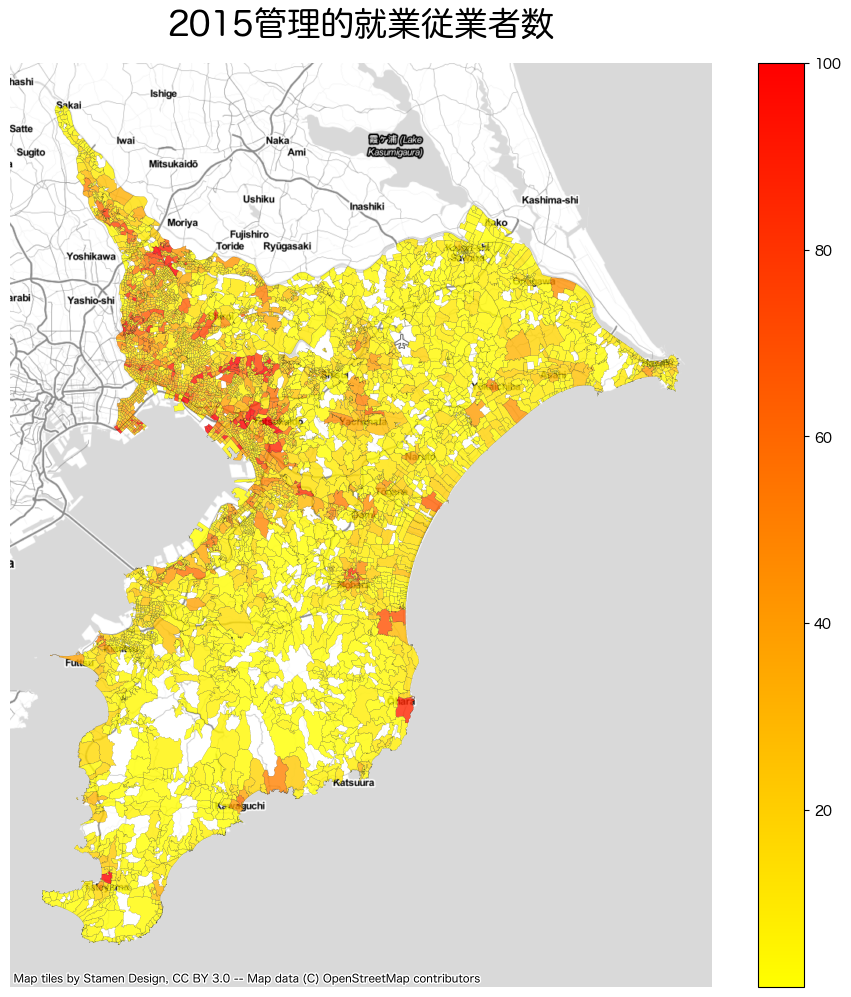

In [102]:
ax = gdf.plot(figsize=(12,12),
         column='T000866002',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=100,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2015管理的就業従業者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [88]:
gdf['CITY_NAME'].value_counts().reset_index()
gdf.info()
citysum=gdf.groupby('CITY_NAME')['T000866002'].sum().reset_index()
citysum=citysum.sort_values('T000866002',ascending=False)
px.bar(citysum.head(10),x='CITY_NAME',y='T000866002')
def rank(job,title):
    citysum=gdf.groupby('CITY_NAME')[job].sum().reset_index()
    citysum=citysum.sort_values(job,ascending=False)
    fig=px.bar(citysum.head(10),x='CITY_NAME',y=job,template='seaborn',title=title)
    fig.show()
rank(job='T000866002',title='2015管理的就業従業者数')


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6583 non-null   float64 
 1   PREF        6583 non-null   object  
 2   CITY        6583 non-null   object  
 3   S_AREA      6583 non-null   object  
 4   PREF_NAME   6583 non-null   object  
 5   CITY_NAME   6583 non-null   object  
 6   S_NAME      6581 non-null   object  
 7   KIGO_E      1036 non-null   object  
 8   HCODE       6583 non-null   int64   
 9   AREA        6583 non-null   float64 
 10  PERIMETER   6583 non-null   float64 
 11  H27KAxx_    6583 non-null   int64   
 12  H27KAxx_ID  6583 non-null   int64   
 13  KEN         6583 non-null   object  
 14  KEN_NAME    6583 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  GST_NAME    6583 non-null   object  
 17  CSS_NAME    1167 non-null   object  
 18  KIHON1      6583 non-null   object  
 19

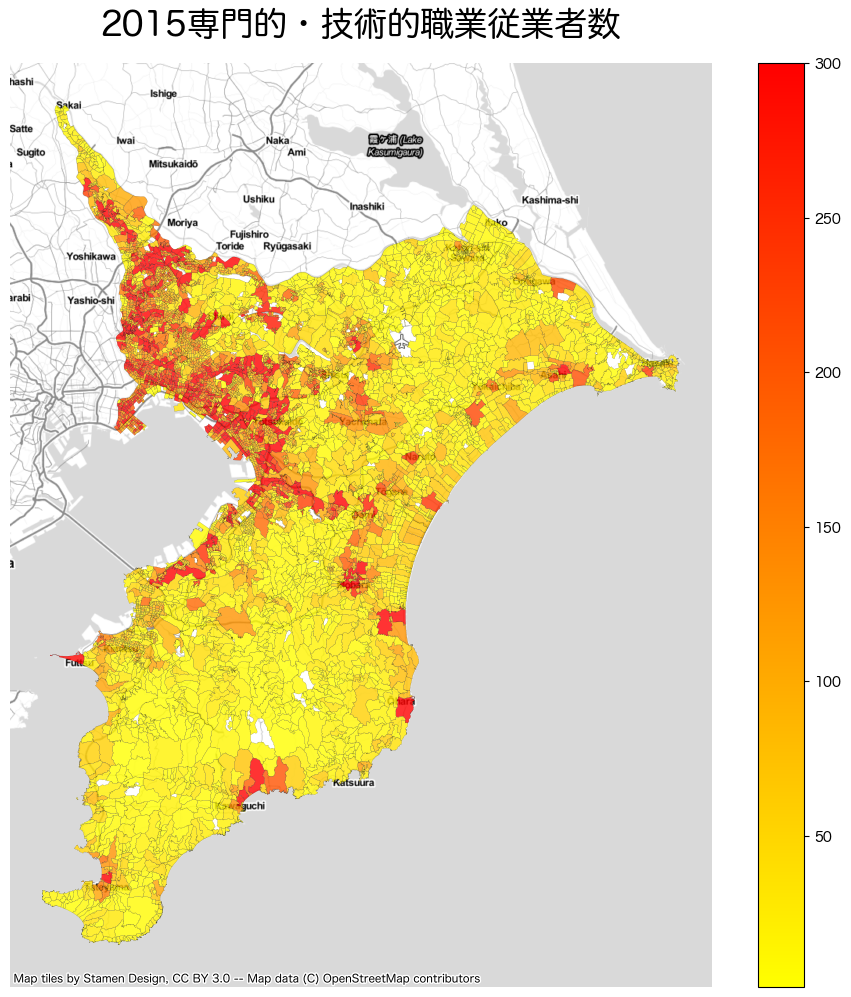

In [89]:
ax = gdf.plot(figsize=(12,12),
         column='T000866003',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=300,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2015専門的・技術的職業従業者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [90]:
gdf['CITY_NAME'].value_counts().reset_index()
gdf.info()
citysum=gdf.groupby('CITY_NAME')['T000866003'].sum().reset_index()
citysum=citysum.sort_values('T000866003',ascending=False)
px.bar(citysum.head(10),x='CITY_NAME',y='T000866003')
def rank(job,title):
    citysum=gdf.groupby('CITY_NAME')[job].sum().reset_index()
    citysum=citysum.sort_values(job,ascending=False)
    fig=px.bar(citysum.head(10),x='CITY_NAME',y=job,template='seaborn',title=title)
    fig.show()
rank(job='T000866003',title='2015専門的・技術的職業従業者数')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6583 non-null   float64 
 1   PREF        6583 non-null   object  
 2   CITY        6583 non-null   object  
 3   S_AREA      6583 non-null   object  
 4   PREF_NAME   6583 non-null   object  
 5   CITY_NAME   6583 non-null   object  
 6   S_NAME      6581 non-null   object  
 7   KIGO_E      1036 non-null   object  
 8   HCODE       6583 non-null   int64   
 9   AREA        6583 non-null   float64 
 10  PERIMETER   6583 non-null   float64 
 11  H27KAxx_    6583 non-null   int64   
 12  H27KAxx_ID  6583 non-null   int64   
 13  KEN         6583 non-null   object  
 14  KEN_NAME    6583 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  GST_NAME    6583 non-null   object  
 17  CSS_NAME    1167 non-null   object  
 18  KIHON1      6583 non-null   object  
 19

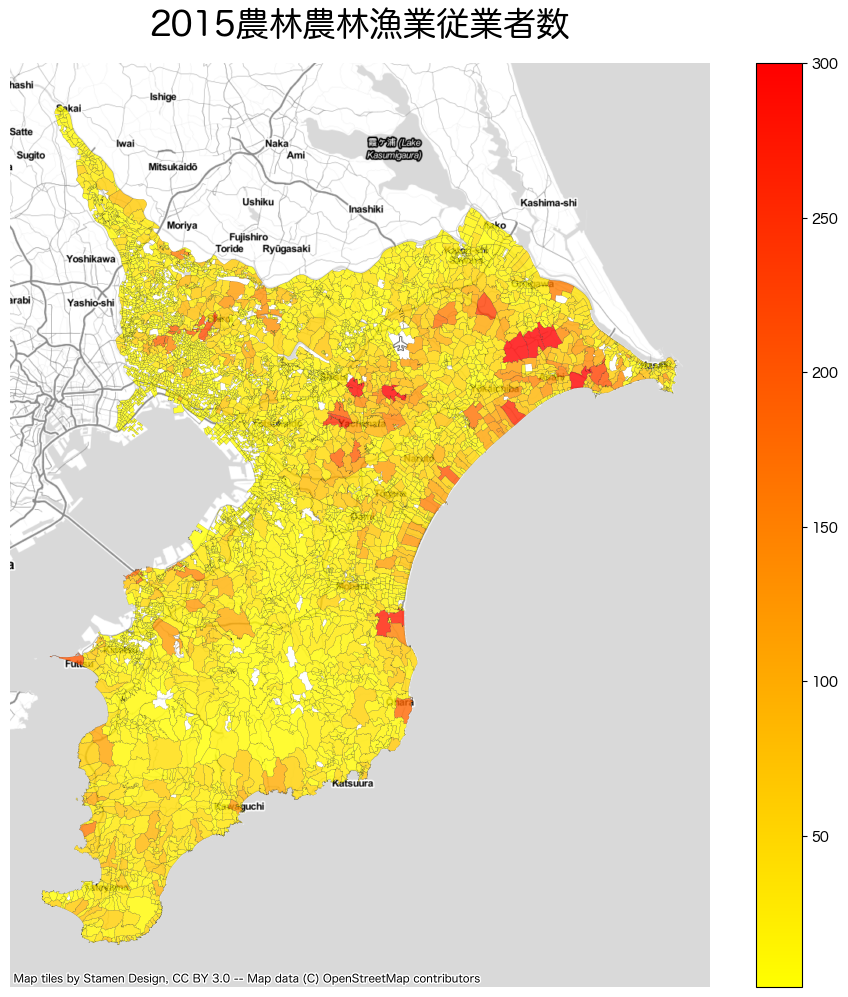

In [92]:
ax = gdf.plot(figsize=(12,12),
         column='T000866008',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=300,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2015農林農林漁業従業者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [93]:
gdf['CITY_NAME'].value_counts().reset_index()
gdf.info()
citysum=gdf.groupby('CITY_NAME')['T000866008'].sum().reset_index()
citysum=citysum.sort_values('T000866008',ascending=False)
px.bar(citysum.head(10),x='CITY_NAME',y='T000866008')
def rank(job,title):
    citysum=gdf.groupby('CITY_NAME')[job].sum().reset_index()
    citysum=citysum.sort_values(job,ascending=False)
    fig=px.bar(citysum.head(10),x='CITY_NAME',y=job,template='seaborn',title=title)
    fig.show()
rank(job='T000866008',title='2015農林農林漁業従業者数')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6583 non-null   float64 
 1   PREF        6583 non-null   object  
 2   CITY        6583 non-null   object  
 3   S_AREA      6583 non-null   object  
 4   PREF_NAME   6583 non-null   object  
 5   CITY_NAME   6583 non-null   object  
 6   S_NAME      6581 non-null   object  
 7   KIGO_E      1036 non-null   object  
 8   HCODE       6583 non-null   int64   
 9   AREA        6583 non-null   float64 
 10  PERIMETER   6583 non-null   float64 
 11  H27KAxx_    6583 non-null   int64   
 12  H27KAxx_ID  6583 non-null   int64   
 13  KEN         6583 non-null   object  
 14  KEN_NAME    6583 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  GST_NAME    6583 non-null   object  
 17  CSS_NAME    1167 non-null   object  
 18  KIHON1      6583 non-null   object  
 19

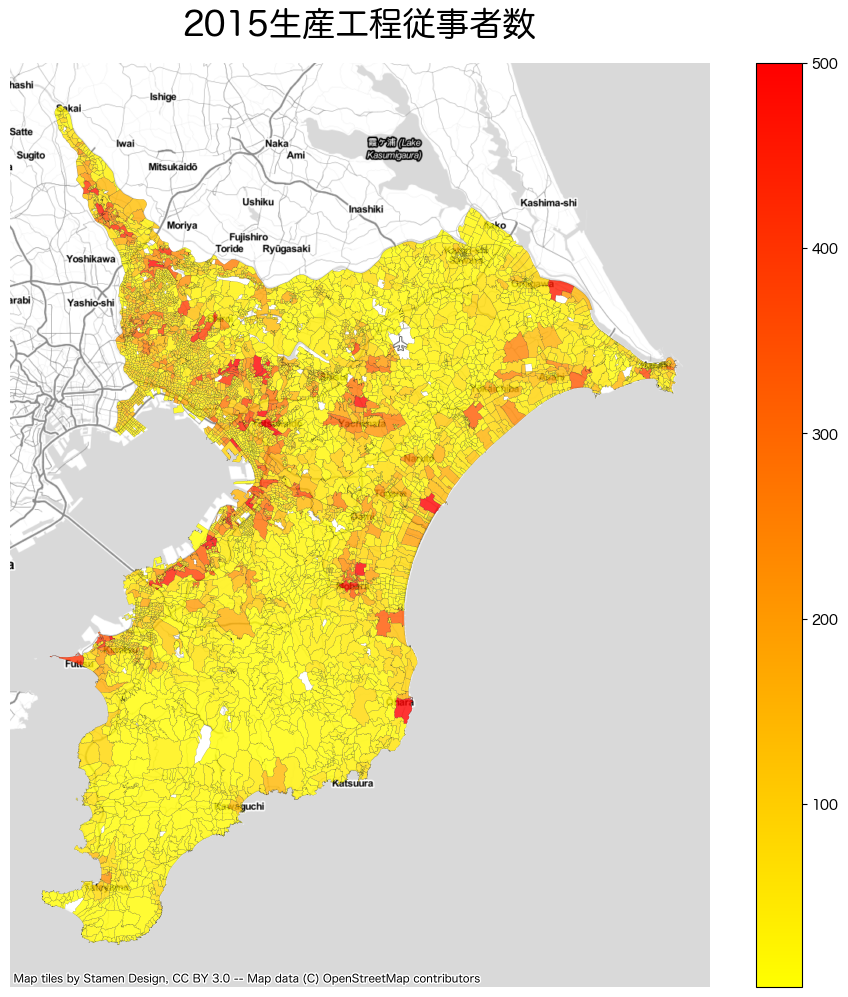

In [104]:
ax = gdf.plot(figsize=(12,12),
         column='T000866009',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=500
        ,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2015生産工程従事者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [95]:
gdf['CITY_NAME'].value_counts().reset_index()
gdf.info()
citysum=gdf.groupby('CITY_NAME')['T000866009'].sum().reset_index()
citysum=citysum.sort_values('T000866009',ascending=False)
px.bar(citysum.head(10),x='CITY_NAME',y='T000866009')
def rank(job,title):
    citysum=gdf.groupby('CITY_NAME')[job].sum().reset_index()
    citysum=citysum.sort_values(job,ascending=False)
    fig=px.bar(citysum.head(10),x='CITY_NAME',y=job,template='seaborn',title=title)
    fig.show()
rank(job='T000866009',title='2015生産工程従事者数')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6583 non-null   float64 
 1   PREF        6583 non-null   object  
 2   CITY        6583 non-null   object  
 3   S_AREA      6583 non-null   object  
 4   PREF_NAME   6583 non-null   object  
 5   CITY_NAME   6583 non-null   object  
 6   S_NAME      6581 non-null   object  
 7   KIGO_E      1036 non-null   object  
 8   HCODE       6583 non-null   int64   
 9   AREA        6583 non-null   float64 
 10  PERIMETER   6583 non-null   float64 
 11  H27KAxx_    6583 non-null   int64   
 12  H27KAxx_ID  6583 non-null   int64   
 13  KEN         6583 non-null   object  
 14  KEN_NAME    6583 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  GST_NAME    6583 non-null   object  
 17  CSS_NAME    1167 non-null   object  
 18  KIHON1      6583 non-null   object  
 19

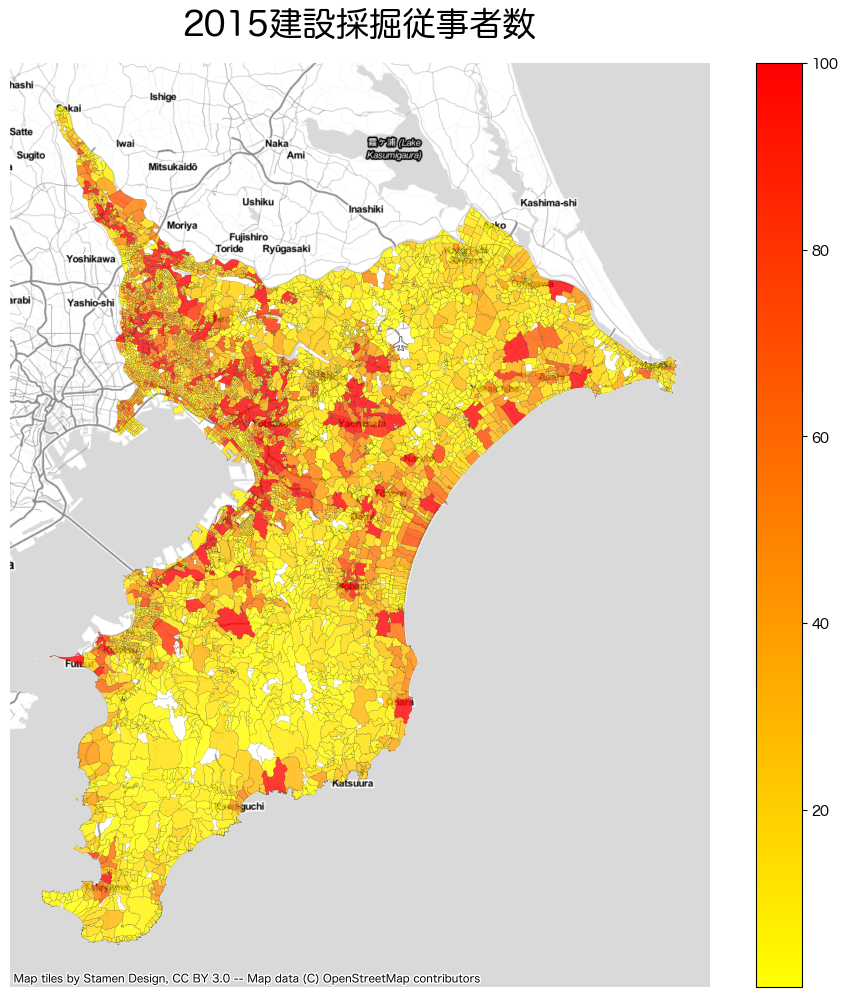

In [105]:
ax = gdf.plot(figsize=(12,12),
         column='T000866011',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         vmax=100,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2015建設採掘従事者数',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [98]:
gdf['CITY_NAME'].value_counts().reset_index()
gdf.info()
citysum=gdf.groupby('CITY_NAME')['T000866011'].sum().reset_index()
citysum=citysum.sort_values('T000866011',ascending=False)
px.bar(citysum.head(10),x='CITY_NAME',y='T000866011')
def rank(job,title):
    citysum=gdf.groupby('CITY_NAME')[job].sum().reset_index()
    citysum=citysum.sort_values(job,ascending=False)
    fig=px.bar(citysum.head(10),x='CITY_NAME',y=job,template='seaborn',title=title)
    fig.show()
rank(job='T000866011',title='2015建設採掘従事者数')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6583 non-null   float64 
 1   PREF        6583 non-null   object  
 2   CITY        6583 non-null   object  
 3   S_AREA      6583 non-null   object  
 4   PREF_NAME   6583 non-null   object  
 5   CITY_NAME   6583 non-null   object  
 6   S_NAME      6581 non-null   object  
 7   KIGO_E      1036 non-null   object  
 8   HCODE       6583 non-null   int64   
 9   AREA        6583 non-null   float64 
 10  PERIMETER   6583 non-null   float64 
 11  H27KAxx_    6583 non-null   int64   
 12  H27KAxx_ID  6583 non-null   int64   
 13  KEN         6583 non-null   object  
 14  KEN_NAME    6583 non-null   object  
 15  SITYO_NAME  0 non-null      float64 
 16  GST_NAME    6583 non-null   object  
 17  CSS_NAME    1167 non-null   object  
 18  KIHON1      6583 non-null   object  
 19